<a href="https://colab.research.google.com/github/Sushant6862/Jeremy-Howard-Squadron-/blob/main/Bostan_House_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas module
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

# making data frame
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv",header=None, delimiter=r"\s+",names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
data = data.astype(float)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [ ]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
pip install klib

In [ ]:
import klib
klib.cat_plot(data)

No columns with categorical data were detected.


In [ ]:
klib.corr_mat(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [ ]:
# klib.corr_plot(data, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
# klib.corr_plot(data, split='neg') # displaying only negative correlations

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables to standardize
x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a copy of the DataFrame to keep the original data
data_standardized = data.copy()

# Standardize the specified variables
scaler = StandardScaler()
data_standardized[x_vars] = scaler.fit_transform(data[x_vars])

# Display the standardized DataFrame
print(data_standardized.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2  


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables for which to calculate VIF
x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a DataFrame containing only the specified x_vars
x_data = data_standardized[x_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars
vif_data["VIF"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

# Display the VIF values
print(vif_data)

   Variable       VIF
0      CRIM  1.792192
1        ZN  2.298758
2     INDUS  3.991596
3      CHAS  1.073995
4       NOX  4.393720
5        RM  1.933744
6       AGE  3.100826
7       DIS  3.955945
8       RAD  7.484496
9       TAX  9.008554
10  PTRATIO  1.799084
11        B  1.348521
12    LSTAT  2.941491


In [ ]:
# Assuming 'your_dataframe' is your DataFrame with 290,000 rows and 18 columns
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Calculate Q1, Q3, and IQR for each column
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = (data < lower_bound) | (data > upper_bound)

# Optionally, remove outliers from the DataFrame
filtered_dataframe1 = data[~outliers.any(axis=1)]

# Display information about outliers and filtered DataFrame
print("Columns with Outliers:")
print(outliers.sum())

print("\nOriginal DataFrame Shape:", data.shape)
print("Filtered DataFrame Shape:", filtered_dataframe1.shape)

Columns with Outliers:
CRIM       6
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Original DataFrame Shape: (506, 13)
Filtered DataFrame Shape: (500, 13)


In [ ]:
data=filtered_dataframe1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     500 non-null    float64
 1   ZN       500 non-null    float64
 2   INDUS    500 non-null    float64
 3   CHAS     500 non-null    float64
 4   NOX      500 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      500 non-null    float64
 7   DIS      500 non-null    float64
 8   RAD      500 non-null    float64
 9   PTRATIO  500 non-null    float64
 10  B        500 non-null    float64
 11  LSTAT    500 non-null    float64
 12  MEDV     500 non-null    float64
dtypes: float64(13)
memory usage: 54.7 KB


In [ ]:
from sklearn.model_selection import train_test_split
X = data_standardized.drop('MEDV',axis=1) # Independet variable
y = data_standardized['MEDV'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Fit XGBoost on the dataset
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
train_pred_best = best_model.predict(X_train)
test_pred_best = best_model.predict(X_test)

train_rmse_best = np.sqrt(mean_squared_error(y_train, train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, test_pred_best))

print("Train RMSE (Best Model):", train_rmse_best)
print("Test RMSE (Best Model):", test_rmse_best)

# Implement early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]
model_early_stopping = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
model_early_stopping.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

# Feature importance
feature_importance = model_early_stopping.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]



Train RMSE: 0.016177874347066197
Test RMSE: 3.490208092565584
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Train RMSE (Best Model): 0.08233543311237691
Test RMSE (Best Model): 3.713488163716536
[0]	validation_0-rmse:8.46591	validation_1-rmse:8.52381
[1]	validation_0-rmse:7.80801	validation_1-rmse:7.94804
[2]	validation_0-rmse:7.22020	validation_1-rmse:7.37885
[3]	validation_0-rmse:6.70852	validation_1-rmse:6.89489
[4]	validation_0-rmse:6.22758	validation_1-rmse:6.52610
[5]	validation_0-rmse:5.80051	validation_1-rmse:6.18035
[6]	validation_0-rmse:5.42354	validation_1-rmse:5.87725
[7]	validation_0-rmse:5.07288	validation_1-rmse:5.57638
[8]	validation_0-rmse:4.77468	validation_1-rmse:5.33151
[9]	validation_0-rmse:4.49103	validation_1-rmse:5.06553
[10]	validation_0-rmse:4.25407	validation_1-rmse:4.89178
[11]	validation_0-rmse:4.02944	validation_1-rmse:4.75993
[12]	validation_0-rmse:3.83058	validation_1-rmse:4.64483
[13]	validation_0-rmse:3.65584	validation_1

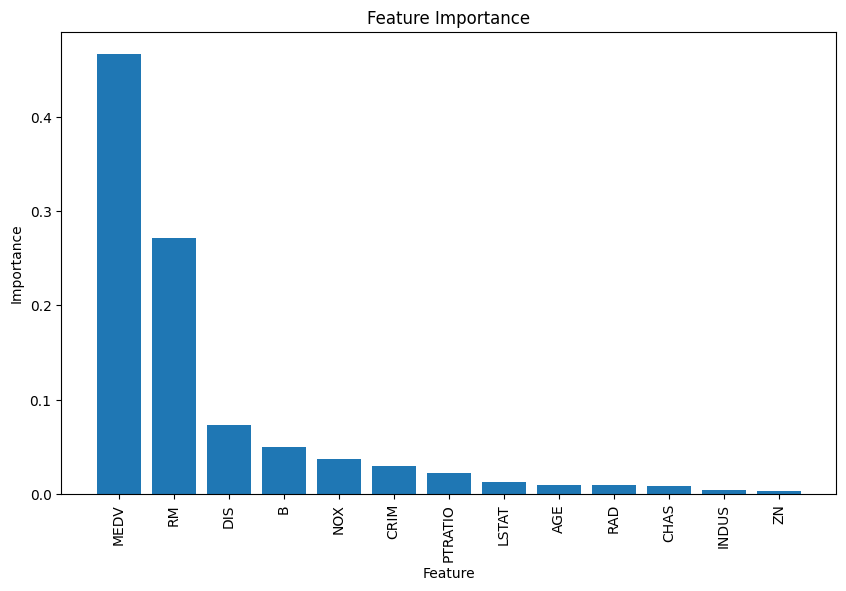

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), np.array(data.columns)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



# Fit LightGBM on the dataset
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
train_pred_best = best_model.predict(X_train)
test_pred_best = best_model.predict(X_test)

train_rmse_best = np.sqrt(mean_squared_error(y_train, train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, test_pred_best))

print("Train RMSE (Best Model):", train_rmse_best)
print("Test RMSE (Best Model):", test_rmse_best)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.563614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# # Implement early stopping
# eval_set = [(X_test, y_test)]
# model_early_stopping = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
# model_early_stopping.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=10, verbose=True)

# # Feature importance
# feature_importance = model_early_stopping.feature_importances_
# sorted_idx = np.argsort(feature_importance)[::-1]

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
# plt.xticks(range(X_train.shape[1]), np.array(X.columns)[sorted_idx], rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.title('Feature Importance')
# plt.show()